# Исследование сервиса аренды самокатов GoFast
Необходимо проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.<p>
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
- без подписки:<p>
абонентская плата отсутствует;<p>
стоимость одной минуты поездки — 8 рублей;<p>
стоимость старта (начала поездки) — 50 рублей;<p>

- с подпиской Ultra:<p>
абонентская плата — 199 рублей в месяц;<p>
стоимость одной минуты поездки — 6 рублей;<p>
стоимость старта — бесплатно.<p>

В основных данных есть информация о пользователях, их поездках и подписках. 

*Пользователи — users_go.csv*:
* user_id - уникальный идентификатор пользователя; 
* name - имя пользователя; 
* age - возраст;
* city - город;
* subscription_type - тип подписки (free, ultra).

*Поездки — rides_go.csv:*
* user_id - уникальный идентификатор пользователя;
* distance - расстояние, которое пользователь проехал в текущей сессии (в метрах);
* duration - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»;
* date - дата совершения поездки.

*Подписки — subscriptions_go.csv:*
* subscription_type - тип подписки;
* minute_price - стоимость одной минуты поездки по данной подписке;
* start_ride_price - стоимость начала поездки;
* subscription_fee - стоимость ежемесячного платежа.




#### Шаг 1. Загрузка данных

In [1]:
import pandas as pd #импортируем библиотеку pandas
import matplotlib.pyplot as plt #импортируем библиотеку для работы с графиками
from scipy import stats as st #импортируем библиотеку stats
import numpy as np

In [2]:
pd.set_option('max_columns', None) #отобразим все столбцы

In [3]:
try:
    data_users = pd.read_csv('/datasets/users_go.csv')
except:
    data_users = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv')

In [4]:
#прочтем файл с данными о поездках
try:
    data_rides = pd.read_csv('/datasets/rides_go.csv')
except:
    data_rides = pd.read_csv('https://code.s3.yandex.net/datasets/rides_go.csv')

In [5]:
#прочтем файл с данными о подписках
try:
    data_sub = pd.read_csv('/datasets/subscriptions_go.csv')
except:
    data_sub = pd.read_csv('https://code.s3.yandex.net/datasets/subscriptions_go.csv')


In [6]:
data_users.head(20) #посмотрим первые строк о пользователях

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [7]:
data_users.info() #посмотрим основную информацию по датафрейму с пользователями

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [8]:
data_users.describe() #посмотрим статистические описание датафрейма пользователи

,user_id,age
count,1565.000000,1565.000000
mean,762.633866,24.922045
std,443.260155,4.553496
min,1.000000,12.000000
25%,378.000000,22.000000
50%,762.000000,25.000000
75%,1146.000000,28.000000
max,1534.000000,43.000000


In [9]:
data_rides.head(20) #посмотрим первые 20 строк о поездках

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [10]:
data_rides.info() #посмотрим основную информацию по датафрейму с поездками

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [11]:
data_rides.describe() #посмотрим статистические описание датафрейма с поездками

,user_id,distance,duration
count,18068.000000,18068.000000,18068.000000
mean,842.869936,3070.659976,17.805011
std,434.734317,1116.831209,6.091051
min,1.000000,0.855683,0.500000
25%,487.000000,2543.226360,13.597563
50%,889.000000,3133.609994,17.678395
75%,1213.250000,3776.222735,21.724800
max,1534.000000,7211.007745,40.823963


In [12]:
data_sub.head(20) #посмотрим первые 20 строк о подписках

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [13]:
data_sub.info() #посмотрим основную информацию по датафрейму с подписками

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


**Вывод по шагу 1:**
По датафрейму с пользователями видимых замечаний не обнаружено. Количество значений одинаковое. Требуется дополнительно ознакомится с уникальными значениями по городам. 

По датафрейму с поездками - количество значений одинаковое, требуется изменить формат даты. Видны минимальные значения по дистанции и продолжительности , требуется дополнительно ознакомиться с данными на предмет выявления аномалии. Дополнительно посмотретьь совпадает ли количество user_id в обоих датафреймах.

По датафрейму с подписками замечаний не выявлено. В датафрейме всего две строки.

#### Шаг 2. Предобработка данных

In [14]:
data_users.isna().sum() #проверим количество пропусков в датафрейме о пользователях

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [15]:
data_rides.isna().sum() #проверим количество пропусков в датафрейме о поездках

user_id     0
distance    0
duration    0
date        0
dtype: int64

In [16]:
data_users.duplicated().value_counts() 
#проверим на дубликаты (полностью совпадающие строки) в исходном датафрейме с пользователями 

False    1534
True       31
dtype: int64

In [17]:
data_users[data_users.duplicated() == True] # посмотрим на всякий случай на эти строки

,user_id,name,age,city,subscription_type
1534,293,Агата,26,Краснодар,ultra
1535,16,Амалия,27,Краснодар,ultra
1536,909,Константин,20,Екатеринбург,free
1537,403,Полина,19,Сочи,ultra
1538,908,Рустам,30,Тюмень,free
1539,43,Стефания,22,Омск,ultra
1540,127,Павел,25,Пятигорск,ultra
1541,659,Злата,27,Ростов-на-Дону,ultra
1542,204,Руслан,30,Пятигорск,ultra
1543,153,Герман,23,Москва,ultra


In [18]:
data_users = data_users.drop_duplicates() #удалим строки дубликаты и перезапишем датафрейм

In [19]:
data_users.duplicated().sum() #на всякий случай проверим еще раз наличие дубликатов

0

In [20]:
data_users['city'].unique() #посмотрим уникальные значение в столбце с названиями городов для выявления неявных дубликатов

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

In [21]:
data_rides.duplicated().value_counts() 
#проверим на дубликаты (полностью совпадающие строки) в исходном датафрейме с поездками  

False    18068
dtype: int64

In [22]:
data_rides['date'] = pd.to_datetime(data_rides['date'], format = '%Y-%m-%d') 
#изменим формат столбца с датой в датафрейме data_rides

In [23]:
data_rides['date'].dtypes #проверим выполнение смены типа в столбце data датафрейма data_rides

dtype('<M8[ns]')

In [24]:
data_rides['number_month'] = data_rides['date'].dt.month #создадим новый столбец в датафрейме data_rides с номером месяца

In [25]:
data_rides['user_id'].nunique() - data_users['user_id'].nunique() 
#проверим совпадает ли количество id в датафреймайх data_rides и data_users 

0

In [26]:
data_rides.sort_values(by='distance', ascending=True).head(20) #выведем 20 строк к наименьшими значениями по столбцу distance

,user_id,distance,duration,date,number_month
11555,1069,0.855683,10.001902,2021-01-31,1
9541,925,2.570787,3.011018,2021-10-19,10
13690,1223,4.329506,4.008958,2021-05-22,5
8658,861,6.784447,6.015656,2021-07-21,7
7841,796,7.097072,10.026614,2021-11-26,11
8906,880,11.283615,2.035632,2021-03-28,3
8324,835,12.233115,4.034952,2021-09-19,9
13940,1240,15.000606,10.045002,2021-08-20,8
15626,1364,15.366168,6.057623,2021-08-22,8
11862,1091,15.630873,13.044660,2021-03-29,3


In [27]:
data_users[data_users['user_id']==1069] 
# посмотрим в каком городе находится пользователь 1069, т.к.31 января не везде можно ездить, 
#возможно столь малая дистанция была вызвана непроходимостью по сугробам.

,user_id,name,age,city,subscription_type
1068,1069,Степан,20,Сочи,free


In [28]:
data_rides[data_rides['user_id']==1069].sort_values(by='date',ascending=True) 
#посмотрим на поездки это пользователя 1069, возможно самокат- новый вид транспорта для него и он долго осваивался

,user_id,distance,duration,date,number_month
11554,1069,2950.223566,14.375559,2021-01-07,1
11555,1069,0.855683,10.001902,2021-01-31,1
11556,1069,4055.997694,26.382847,2021-01-31,1
11557,1069,3527.772916,24.242398,2021-02-07,2
11558,1069,2016.747075,21.083735,2021-03-18,3
11559,1069,5780.316092,0.500000,2021-04-06,4
11560,1069,4689.915558,13.822882,2021-04-07,4
11561,1069,3985.184651,9.970369,2021-04-25,4
11562,1069,4473.933672,23.174001,2021-05-07,5
11563,1069,3308.001455,29.267699,2021-05-12,5


Пользователь 1069 часто пользуется самокатами, значит столь малая дистанция и большая продолжительность вызваны явно не его умениями водить. Возможно с самокатом было что-то не то. Однако по данному же пользователю видна большая дистанция и малая продолжительность (строка 11559) - тут явно проблема либо техническая при выгрузке, либо техническая с самокатом.

In [29]:
data_rides.sort_values(by='duration', ascending=True).head(30) #выведем 30 строк к наименьшими значениями по столбцу duration

,user_id,distance,duration,date,number_month
12013,1102,4602.122401,0.5,2021-08-01,8
17314,1483,4445.481070,0.5,2021-03-06,3
15029,1318,5894.633314,0.5,2021-03-28,3
7437,766,4539.088310,0.5,2021-12-22,12
12967,1172,4907.140751,0.5,2021-12-19,12
15015,1317,4593.389022,0.5,2021-07-16,7
13012,1176,4935.071045,0.5,2021-05-14,5
7508,772,4718.820996,0.5,2021-05-22,5
16589,1428,5059.187375,0.5,2021-05-06,5
9049,890,4848.485014,0.5,2021-11-20,11


In [30]:
data_rides[data_rides['duration']==0.5].sort_values(by='distance',ascending=False) 
#посмотрим на поездки с продолжительностью 0.5 по убыванию дистанции

,user_id,distance,duration,date,number_month
16309,1411,7211.007745,0.5,2021-04-15,4
17242,1477,6724.932981,0.5,2021-01-12,1
11385,1057,6601.197575,0.5,2021-02-07,2
13701,1224,6414.516026,0.5,2021-07-15,7
14574,1285,6316.574814,0.5,2021-09-25,9
...,...,...,...,...,...
14342,1268,4177.139336,0.5,2021-06-09,6
9698,937,4169.066800,0.5,2021-12-12,12
10692,1006,4106.278268,0.5,2021-10-31,10
17909,1524,4103.998874,0.5,2021-06-18,6


Вряд ли пользователи могли проехать такое большое расстояние за такое малое время. Возможно ошибка техническая с самокатами или техническая при выгрузке данных. 

In [31]:
data_rides.describe() 
#посмотрим еще раз статистические описание датафрейма с поездками
#чтобы оценить сильно ли влияют эти строки на общее распределение

,user_id,distance,duration,number_month
count,18068.000000,18068.000000,18068.000000,18068.000000
mean,842.869936,3070.659976,17.805011,6.486772
std,434.734317,1116.831209,6.091051,3.437410
min,1.000000,0.855683,0.500000,1.000000
25%,487.000000,2543.226360,13.597563,4.000000
50%,889.000000,3133.609994,17.678395,6.000000
75%,1213.250000,3776.222735,21.724800,9.000000
max,1534.000000,7211.007745,40.823963,12.000000


In [32]:
data_rides['distance'].median()/data_rides['duration'].median() #посмотрим скорость по медианным значениям

177.25648040557462

In [33]:
#удалим строки из датафрейма, в которых продолжительность поездки составляет 0.5
index = data_rides[data_rides['duration'] == 0.5].index
data_rides.drop(index, inplace=True)

In [34]:
data_rides[data_rides['duration']==0.5] #проверим удаление


,user_id,distance,duration,date,number_month


In [35]:
data_rides.describe() #посмотрим как изменилось статистическое описание после удаления строк


,user_id,distance,duration,number_month
count,17973.000000,17973.000000,17973.000000,17973.000000
mean,841.551995,3059.863833,17.896480,6.486786
std,435.144929,1108.814612,5.975424,3.436024
min,1.000000,0.855683,2.035632,1.000000
25%,484.000000,2538.839628,13.670439,4.000000
50%,887.000000,3129.029255,17.714122,6.000000
75%,1213.000000,3762.636244,21.747016,9.000000
max,1534.000000,7066.003772,40.823963,12.000000


In [36]:
data_rides['distance'].median()/data_rides['duration'].median() #посмотрим на обновленную скорость по медианным значениям

176.6403758331612

177 м/минуту звучит реалистично. Строки с продолжительностью поездки 0.5 удаляем.

**Вывод по шагу 2**: 
- В датафрейме с пользователями (data_users) выявлены 31 дубликаты, значения удаляем. Неявных дубликатов не обнаружено. 
- Количество пользователей в датафреймах data_rides и data_users совпадает.
- В датафрейме с поездками (data_rides) дубликатов не выявлено. 
- Произведена смена формата даты. Добавлен столбец с номером месяца. 
- В данных по датафрейму data_rides есть необычные строки - с необычно малой дистанцией и большой для нее продолжительностью, предполагаю два варианта: либо эта строка ошибочна, либо c самокатом было что-то не то. Также имеются строки с необычайно малой продолжительностью и большой дистанцией. Предполагаю техническую ошибку с самокатом или техническую проблему по выгрузке. Строки удалены.

Требуются дополнительные данные по количеству обращений пользователей в техподдержку сервиса до и после обновления технической инфраструктуры.


#### Шаг 3. Исследовательский анализ данных

##### Частота встречаемости городов<a id='location'></a>

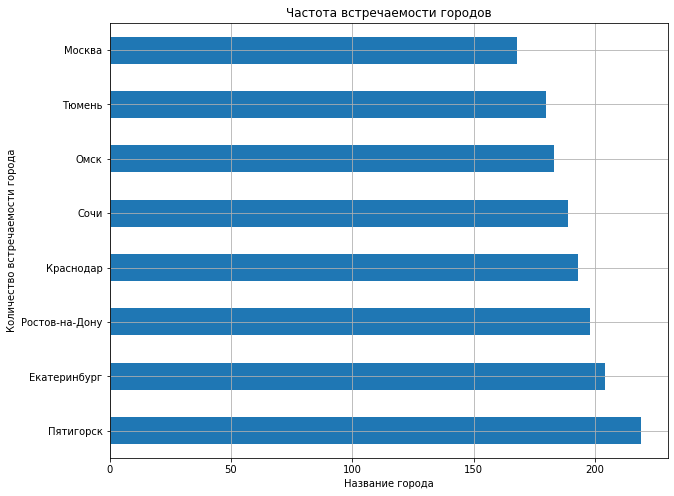

In [37]:
#построим столбчатый график по частоте городов
data_users['city'].value_counts().plot(
    title='Частота встречаемости городов',
    grid=True,
    figsize = (10,8),
    kind='barh',
    y='city',
    ylabel='Количество встречаемости города',
    xlabel='Название города',
)
plt.ylabel('Количество встречаемости городa')
plt.xlabel('Название города')
plt.show()

In [38]:
data_users['city'].value_counts() #посмотрим распределение более точно на цифрах

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

Вывод: Как видно из столбчатого графика, самокаты GoFast больше всего присутствуют в Пятигорске, Екатеринбурге и Ростове-на-Дону, меньше всего этих самокатов в Москве. Возможно распределение именно такое, потому что , например, в Москве большую долю самокатов занимает Яндекс, Юрент, Вуш. Было бы хорошо изучить доли присутствия самокатов разных фирм в городе. 

##### Соотношение пользователей с подпиской и без подписки <a id='count'></a>

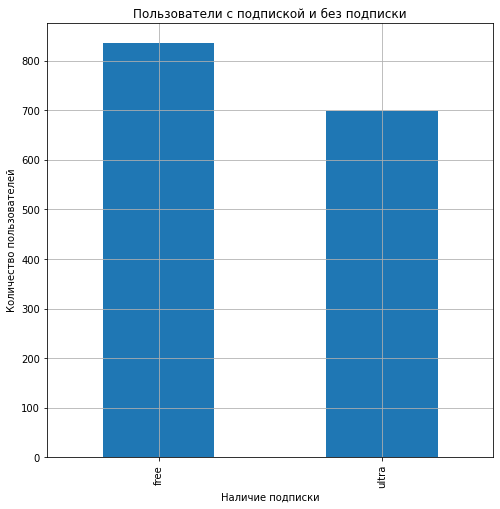

In [39]:
#построим столбчатый график по пользователям с подпиской и без
data_users['subscription_type'].value_counts().plot(
    title='Пользователи с подпиской и без подписки',
    grid=True,
    figsize = (8,8),
    kind='bar',
    xlabel='Наличие подписки',
    ylabel='Количество пользователей',


)
plt.show()

In [40]:
data_users['subscription_type'].value_counts()#посмотрим распределение более точно на цифрах

free     835
ultra    699
Name: subscription_type, dtype: int64

In [41]:
#соотношение пользователей с подпиской к пользователям без подписки
data_users['subscription_type'].where(data_users['subscription_type']=='free').count()\
/data_users['subscription_type'].where(data_users['subscription_type']=='ultra').count()

1.1945636623748213

Вывод:Как видно на графике, пользователей с подпиской меньше чем пользователей без подписки. Соотношение пользователей с подпиской к пользователям без подписки составляет 1.2. Если пользователь в месяц совершает менее 4-х поездок, то оформлять подписку ему не выгодно. Если более 4-х поездок, то стоит рассмотреть подписку.

##### Возраст пользователей <a id='year'></a>

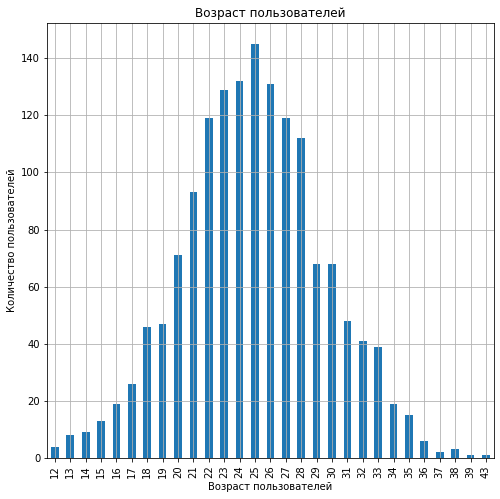

In [42]:
#построим гистограмму возраста пользователей
data_users['age'].value_counts().sort_index(ascending=True).plot(
    y='age',
    kind='bar',
    figsize = (8,8),
    grid=True,
    title='Возраст пользователей',
    xlabel='Возраст пользователей',
    ylabel='Количество пользователей',


)
plt.show()

In [43]:
data_users['age'].value_counts() #посмотрим распределение по количеству лет

25    145
24    132
26    131
23    129
27    119
22    119
28    112
21     93
20     71
30     68
29     68
31     48
19     47
18     46
32     41
33     39
17     26
34     19
16     19
35     15
15     13
14      9
13      8
36      6
12      4
38      3
37      2
39      1
43      1
Name: age, dtype: int64

Вывод: Как видно на графике, самокаты являются самыми популярными у пользователей возраста с 22 по 28 лет. Что достаточно логично, т.к. старше 30 лет пользователи чаще выбирают автомобиль. К 40 годам самокатом пользуются единицы. На мой взгляд странным является наличие пользователей до 18 лет. 

##### Расстояние, которое пользователь преодолел за одну поездку <a id='distant'></a>

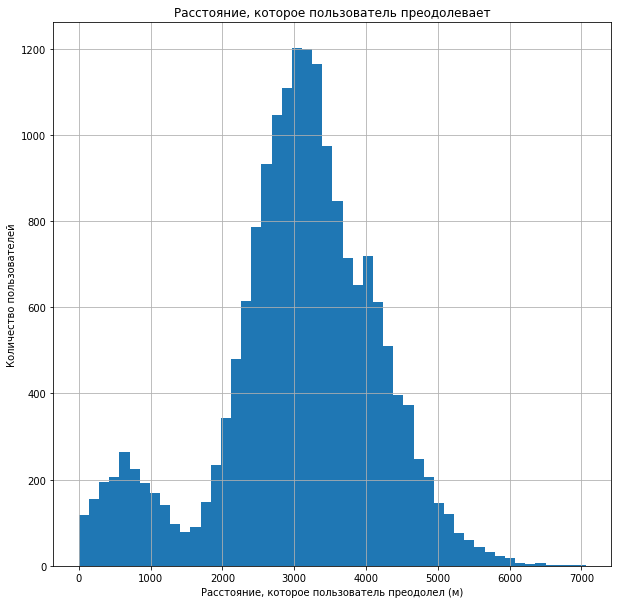

In [44]:
#построим гистограмму распределения дистанции
data_rides['distance'].plot(
    y='distance',
    kind='hist',
    grid=True,
    figsize=(10,10),
    title='Расстояние, которое пользователь преодолевает',
    bins=50
)
plt.ylabel('Количество пользователей')
plt.xlabel('Расстояние, которое пользователь преодолел (м)')
plt.show()

На графике видно, что есть заметное число коротких поездок, на мой взгляд расстояние до 1500 м - это расстояние, которое пользователи преодолевают от транспорта (метро, автобус, и пр.) до места работы/учебы, пешком этот пусть занял бы у них до 20 минут поэтому пользователи отдают предпочтение самокату.

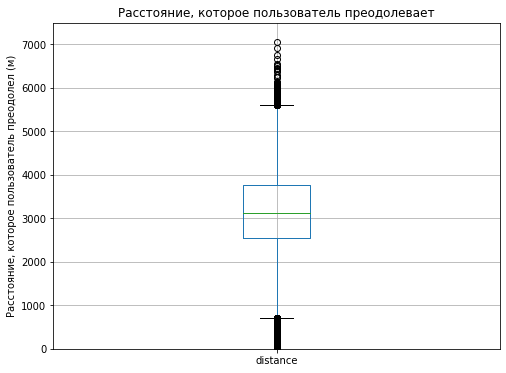

In [45]:
data_rides['distance'].plot(
    kind='box',
    grid=True,
    ylim=(0,7500),
    figsize = (8,6),
    title = 'Расстояние, которое пользователь преодолевает'
)
plt.ylabel('Расстояние, которое пользователь преодолел (м)')
plt.show()
#построим диаграму размаха

In [46]:
data_rides['distance'].describe() #посмотрим статистические данные по столбцу с дистанцией

count    17973.000000
mean      3059.863833
std       1108.814612
min          0.855683
25%       2538.839628
50%       3129.029255
75%       3762.636244
max       7066.003772
Name: distance, dtype: float64

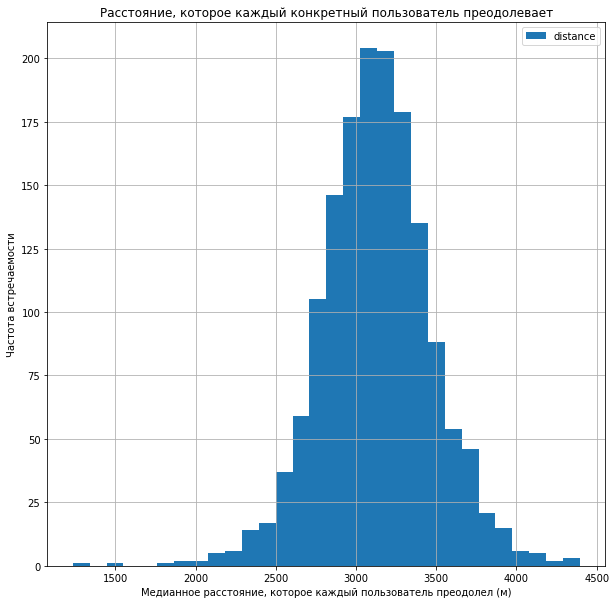

In [47]:
#построим гистограмму по группированным медианным значеним по каждему user_id
data_rides\
.pivot_table(index='user_id', values='distance',aggfunc='median')\
.plot (
    kind='hist', 
    grid=True, 
    figsize=(10,10), 
    title = 'Расстояние, которое каждый конкретный пользователь преодолевает',
    bins=30,
    ylabel='Количество пользователей',
    xlabel='Расстояние, которое пользователь преодолел (м)'
)
plt.ylabel('Частота встречаемости')
plt.xlabel('Медианное расстояние, которое каждый пользователь преодолел (м)')
plt.show()

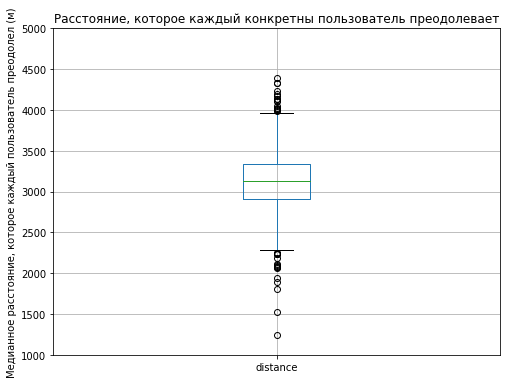

In [48]:
#построим диаграмму размаха по группированным медианным значеним по каждему user_id
data_rides\
.pivot_table(index='user_id', values='distance',aggfunc='median')\
.plot(
    kind='box',
    y='distance',
    grid=True,
    ylim=(1000,5000),
    figsize = (8,6),
    title = 'Расстояние, которое каждый конкретны пользователь преодолевает'
)
plt.ylabel('Медианное расстояние, которое каждый пользователь преодолел (м)')
plt.show()

In [49]:
data_rides\
.pivot_table(index='user_id', values='distance',aggfunc='median')\
.describe()

,distance
count,1534.000000
mean,3127.331593
std,345.475529
min,1234.763317
25%,2909.353325
50%,3127.112770
75%,3335.761246
max,4395.430303


Вывод:
Медианное значение, которое случайный пользователь преодолевает за одну поездку составляет 3129.029255, на графиках видно, что в основном пользователи ездят от 2500 м до 3800 м, что укладывается в межквартильный размах.

При рассмотрении каждого пользователя отдельно на основании его медианного значения расстояния, которое преодолевает каждый конкретный пользователь,можно точнее увидеть, что медианное значение расстояния составляет 3127.112770, а в основном пользователи ездят от 2900 м до 3350 м. 

Как мы видим разница между обоими подходами рассмотрения расстояния, который пользователь преодолел за одну поездку не сильно отличвется, что дает уверенность сделать вывод, что пользователи чаще пользуются самокатами на дистанции от 2,5 км до 3,5 км.

##### Продолжительность поездок <a id='time'></a>

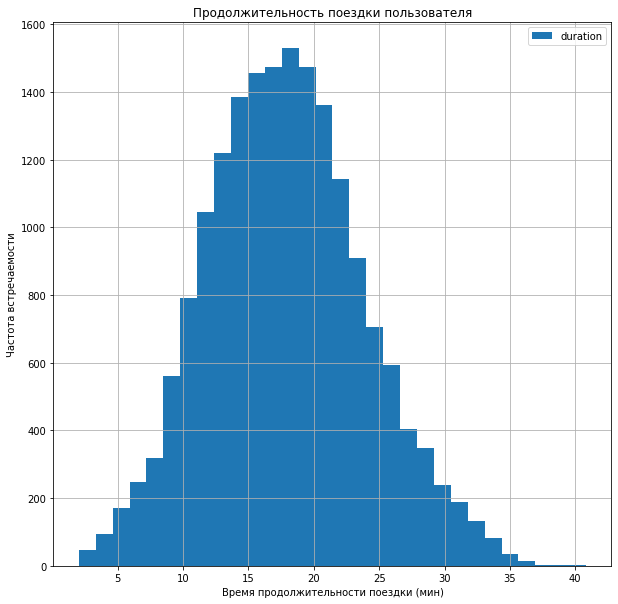

In [50]:
#построим гистограмму распределения продолжительности поездки
data_rides.plot(
    y='duration',
    kind='hist',
    grid=True,
    figsize=(10,10),
    title='Продолжительность поездки пользователя',
    bins=30
)
plt.ylabel('Частота встречаемости')
plt.xlabel('Время продолжительности поездки (мин)')
plt.show()

In [51]:
data_rides['duration'].describe() #посмотрим статистические данные по столбцу с продолжительностью поездки

count    17973.000000
mean        17.896480
std          5.975424
min          2.035632
25%         13.670439
50%         17.714122
75%         21.747016
max         40.823963
Name: duration, dtype: float64

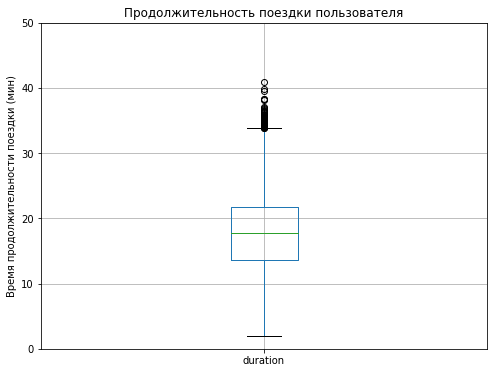

In [52]:
data_rides.plot(
    kind='box',
    y='duration',
    grid=True,
    ylim=(0,50),
    figsize = (8,6),
    title = 'Продолжительность поездки пользователя'
)
plt.ylabel('Время продолжительности поездки (мин)')
plt.show()
#построим диаграму размаха

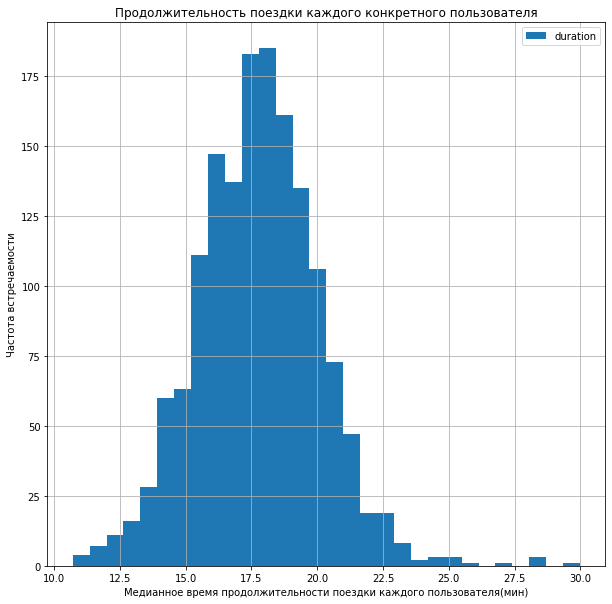

In [53]:
#построим гистограмму по группированным медианным значеним продолжительности поездки по каждему user_id
data_rides\
.pivot_table(index='user_id', values='duration',aggfunc='median')\
.plot (
    kind='hist', 
    grid=True, 
    figsize=(10,10), 
    title = 'Продолжительность поездки каждого конкретного пользователя',
    bins=30
)
plt.ylabel('Частота встречаемости')
plt.xlabel('Медианное время продолжительности поездки каждого пользователя(мин)')
plt.show()

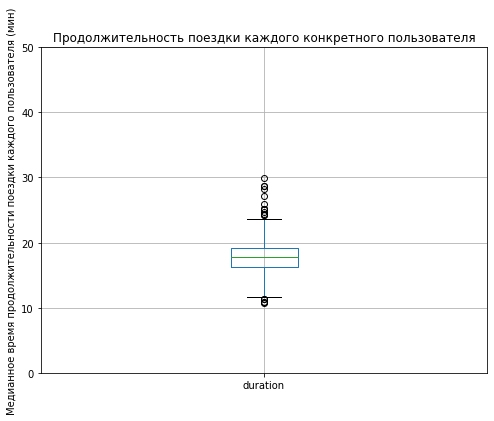

In [54]:
#построим диаграмму размаха по группированным медианным значениям продолжительности поездкам  по каждему user_id
data_rides\
.pivot_table(index='user_id', values='duration',aggfunc='median')\
.plot(
    kind='box',
    y='duration',
    grid=True,
    ylim=(0,50),
    figsize = (8,6),
    title = 'Продолжительность поездки каждого конкретного пользователя'
)
plt.ylabel('Медианное время продолжительности поездки каждого пользователя (мин)')
plt.show()

In [55]:
#посмотрим статистические данные по сгруппированному столбцу с медианными значениями
data_rides\
.pivot_table(index='user_id', values='duration',aggfunc='median')\
.describe()

,duration
count,1534.000000
mean,17.764891
std,2.315473
min,10.711378
25%,16.222831
50%,17.776070
75%,19.234036
max,29.983174


Вывод:
Медианное значение продолжительности поездки случайного пользователя составляет 17.714122 мин, на графиках видно, что в основном пользователи ездят от 13,5 мин до 22 мин, что укладывается в межквартильный размах.

При рассмотрении каждого пользователя отдельно на основании его медианного значения продолжительности поездки, можно точнее увидеть, что медианное значение продолжительности поездки составляет 17.776070 мин, а в основном пользователи ездят от 16 мин до 19 мин. 

Как мы видим разница между обоими подходами рассмотрения продолжительности поездки не критичная, но есть, если рассматривать самые распространенные значения. Но если рассматривать минимальные и максимальные значения разница уже большая. В изначальном датафрейме есть поездки минимальные 2.035632 мин и максимальные 40.823963 мин, но в сгруппированном датафрейме уже минимальное значение 10.711378 мин и максимальное 29.983174 мин.

**Вывод по шагу 3:**

- Самокаты GoFast больше всего присутствуют в Пятигорске, Екатеринбурге и Ростове-на-Дону, меньше всего этих самокатов в Москве. 

- Пользователей с подпиской меньше чем пользователей без подписки.  Соотношение пользователей с подпиской к пользователям без подписки составляет 1.2. Если пользователь в месяц совершает менее 4-х поездок, то оформлять подписку ему не выгодно. Если более 4-х поездок, то стоит рассмотреть подписку.

- Самокаты являются самыми популярными у пользователей возраста с 22 по 28 лет.  К 40 годам самокатом пользуются единицы. На мой взгляд странным является наличие пользователей до 18 лет. 

- Медианное значение, которое случайный пользователь преодолевает за одну поездку составляет 3129.029255, на графиках видно, что в основном пользователи ездят от 2500 м до 3800 м, что укладывается в межквартильный размах.
При рассмотрении каждого пользователя отдельно на основании его медианного значения расстояния, которое преодолевает каждый конкретный пользователь,можно точнее увидеть, что медианное значение расстояния составляет 3127.112770, а в основном пользователи ездят от 2900 м до 3350 м. 
Как мы видим разница между обоими подходами рассмотрения расстояния, который пользователь преодолел за одну поездку не сильно отличвется, что дает уверенность сделать вывод, что пользователи чаще пользуются самокатами на дистанции от 2,5 км до 3,5 км.

- Медианное значение продолжительности поездки случайного пользователя составляет 17.714122 мин, на графиках видно, что в основном пользователи ездят от 13,5 мин до 22 мин, что укладывается в межквартильный размах.
При рассмотрении каждого пользователя отдельно на основании его медианного значения продолжительности поездки, можно точнее увидеть, что медианное значение продолжительности поездки составляет 17.776070 мин, а в основном пользователи ездят от 16 мин до 19 мин. 
Как мы видим разница между обоими подходами рассмотрения продолжительности поездки не критичная, но есть, если рассматривать самые распространенные значения. Но если рассматривать минимальные и максимальные значения разница уже большая. В изначальном датафрейме есть поездки минимальные 2.035632 мин и максимальные 40.823963 мин, но в сгруппированном датафрейме уже минимальное значение 10.711378 мин и максимальное 29.983174 мин.

#### Шаг 4. Объединение данных

##### Объединение данные в один датафрейм <a id='alldata'></a>

In [56]:
data_users_rides = data_users.merge(data_rides, on ='user_id', how='inner')
#соединим методом merge датафрейм с пользователями и поезками


In [57]:
#соединим методом merge датафрейм с пользователями и поезками с датафреймом с подписками
data_users_rides_sub = data_users_rides.merge(data_sub, on='subscription_type',how='inner')

In [58]:
data_users_rides_sub.head(10) #посмотрим получившийся датафрейм

,user_id,name,age,city,subscription_type,distance,duration,date,number_month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.890808,16.650138,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.020292,14.927879,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.118050,23.117468,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.690668,15.238072,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.690645,15.041884,2021-11-22,11,6,0,199


В датафрейме с пользователями количество строк совпадает с количеством пользователей, а в датафрейме с поездками количество строк - это количество поездок, которые пользователи совершили (один пользователь мог совершить и несколько поездок), т.е. максимальное количество строк у нас в датафрейме с поездками. Поэтому объединение прошло успешно если количество строк в новом датафрейме совпадает с количеством строк в датафрейме data_rides .

In [59]:
data_users_rides_sub.shape[0] - data_rides.shape[0] 
#посмотрим разницу строк между количеством в общем датафрейме и датафрейме с поездками

0

In [60]:
data_users_rides_sub['distance'] = round(data_users_rides_sub['distance'],2)
#округлим значения расстояний до 2-х знаков после запятой и перезапишем столбец

In [61]:
data_users_rides_sub['duration'] = round(data_users_rides_sub['duration'],0)
#округлим значения продолжительности до целого числа и перезапишем столбец

In [62]:
data_users_rides_sub.head(5)
#посмотрим на обновленный датафрейм

,user_id,name,age,city,subscription_type,distance,duration,date,number_month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.92,26.0,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.59,16.0,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,6.0,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.78,19.0,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.69,26.0,2021-08-28,8,6,0,199


Вывод: Количество строк в объединенном датафрейме (data_users_rides_sub) совпадает с количеством строк датафрейма о поездках (data_rides), никакие строки не потерялись. Поэтому объединение датафреймов прошло успешно!

Значения в столбце distance округлили до 2-х знаков после запятой, в столбце duration - до целых чисел.

##### Создание датафрейма с данными без подписок и данными с подписками

**Датафрейм о пользователях без подписок**

In [63]:
#создадим датафрейм о пользователях без подписки
data_free = data_users_rides_sub[data_users_rides_sub['subscription_type']=='free']

In [64]:
data_free.head(10) #посмотрим первые 10 строк датафрейма о пользователях без подписки

,user_id,name,age,city,subscription_type,distance,duration,date,number_month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.69,15.0,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.93,16.0,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.43,20.0,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.91,10.0,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.38,17.0,2021-02-14,2,8,50,0
6505,700,Айдар,22,Омск,free,4342.00,22.0,2021-02-23,2,8,50,0
6506,700,Айдар,22,Омск,free,3798.33,18.0,2021-03-03,3,8,50,0
6507,700,Айдар,22,Омск,free,2984.55,15.0,2021-04-09,4,8,50,0
6508,700,Айдар,22,Омск,free,3360.11,17.0,2021-06-12,6,8,50,0
6509,700,Айдар,22,Омск,free,2567.54,11.0,2021-06-23,6,8,50,0


In [65]:
data_free.shape[0] #посмотрим сколько строк в датафрейме о пользователях без подписки

11473

**Датафрейм о пользователях с подписками**

In [66]:
#создадим датафрейм о пользователях с подпиской
data_ultra = data_users_rides_sub[data_users_rides_sub['subscription_type']=='ultra']

In [67]:
data_ultra.head(10) #посмотрим первые 10 строк датафрейма о пользователях с подпиской

,user_id,name,age,city,subscription_type,distance,duration,date,number_month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.92,26.0,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.59,16.0,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,6.0,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.78,19.0,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.69,26.0,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.89,17.0,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.02,15.0,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.12,23.0,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.69,15.0,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.69,15.0,2021-11-22,11,6,0,199


In [68]:
data_ultra.shape[0] #посмотрим сколько строк в датафрейме о пользователях с подпиской

6500

In [69]:
data_free.shape[0] + data_ultra.shape[0] - data_users_rides_sub.shape[0] #проверим не потерялись ли где строки

0

##### Визуализация информации о расстоянии и времени поездок<a id='distance_time'></a>

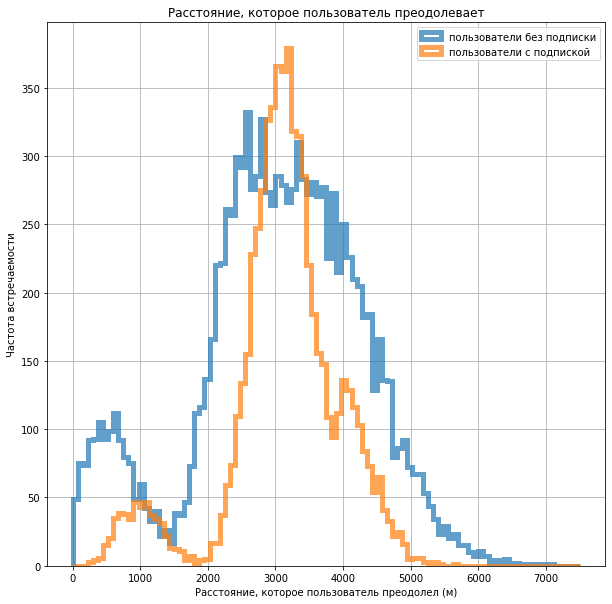

In [70]:
#построим две гистрограммы расстояния на одном графике из датафрейма о пользователях с подпиской 
#и датафрейма с пользователями без подписок
ax = data_free.plot(
    kind='hist',
    y='distance',
    histtype='step',
    range=(0, 7500),
    bins=100,
    linewidth=5,
    alpha=0.7,
    figsize=(10,10),
    label='пользователи без подписки',
)
data_ultra.plot(
    kind='hist',
    y='distance',
    histtype='step',
    range=(0, 7500),
    bins=100,
    linewidth=5,
    alpha=0.7,
    label='пользователи с подпиской',
    figsize=(10,10),
    ax=ax,
    grid=True,
    legend=True,
    title='Расстояние, которое пользователь преодолевает',
) 
plt.ylabel('Частота встречаемости')
plt.xlabel('Расстояние, которое пользователь преодолел (м)')
plt.show()

In [71]:
data_free.shape[0] / data_ultra.shape[0] #соотношение поездок пользователей без подписок к пользователям с подписками

1.765076923076923

In [72]:
data_free['distance'].median() #посмотрим медианное значение дистанции по пользователям без подписки

3102.08

In [73]:
data_ultra['distance'].median() #посмотрим медианное значение дистанции по пользователям с подпиской

3148.6400000000003

Вывод: Как видно по гистограмме пользователи с подпиской больше всего используют самокат для поездок на расстояние 3000 м - 3200 м, по пользователям без подписок пик расстояния шире - пользователи предпочитают поездки от 2000 м до 4200 м.
На короткие дистанции чаще берут самокат пользователи без подписок, что логично для пользователей, которые готовы даже без подписки отдать 50 р за страт и 8 р за минуту, т.е.в пределах 100 рублей за поездку. Однако на более длительные поездки так же больше пользователей без подписки. Скорее всего это связано с тем, что пользователей без подписок почти в 1.2 раза больше, а совершенных поездок пользователями без подписок в 1.8 раз больше.

Как мы видим медианное значение дистанции у пользователей с попиской немного выше чем у пользователей без подписки, что видно на графике.

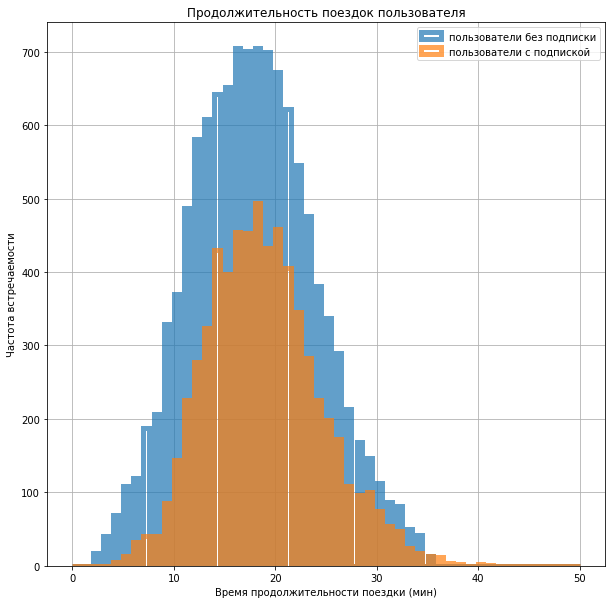

In [74]:
#построим две гистрограммы времени на одном графике из датафрейма о пользователях с подпиской 
#и датафрейма с пользователями без подписок
ax = data_free.plot(
    kind='hist',
    y='duration',
    histtype='step',
    range=(0, 50),
    bins=100,
    linewidth=5,
    alpha=0.7,
    figsize=(10,10),
    label='пользователи без подписки',
)
data_ultra.plot(
    kind='hist',
    y='duration',
    histtype='step',
    range=(0, 50),
    bins=100,
    linewidth=5,
    alpha=0.7,
    label='пользователи с подпиской',
    figsize=(10,10),
    ax=ax,
    grid=True,
    legend=True,
    title='Продолжительность поездок пользователя',
) 
plt.ylabel('Частота встречаемости')
plt.xlabel('Время продолжительности поездки (мин)')
plt.show()

In [75]:
data_free['duration'].median() #посмотрим медианное значение продолжительности по пользователям без подписки

17.0

In [76]:
data_ultra['duration'].median() #посмотрим медианное значение продолжительности по пользователям с подпиской

18.0

Вывод: Как видно по графику продолжительность поездок у пользователей без подписок чуть ниже чем у пользователей с подписками, а так же разное количество пользователей. 
Как мы видим медианное значение продолжительности поездки у пользователей с подпиской совсем немного выше чем у пользователей без подписки, что видно на графике.

**Вывод по шагу 4:** 
- На основании датафрейма о пользователях, датафрейма о поездках и датафрейма о подписках создан общий датафрейм data_users_rides_sub. А также датафрейм о пользователях без подписок data_free и датафрейм о пользователях с подписками data_ultra.

- Пользователи с подпиской больше всего используют самокат для поездок на расстояние 3000 м - 3200 м, у пользователей без подписок пик расстояния "шире" - пользователи предпочитают поездки от 2000 м до 4200 м.
На короткие дистанции чаще берут самокат пользователи без подписок, на более длительные поездки так же больше пользователей без подписки. Скорее всего это связано с тем, что пользователей без подписок почти в 1.2 раза больше, а совершенных поездок пользователями без подписок в 1.8 раз больше.

- Как видно по графику в целом продолжительность поездок у пользователей без подписок немного меньше чем у пользователей с подписками, а так же разное количество пользователей. 

#### Шаг 5. Подсчёт выручки

##### Создание датафрейма с агрегированными данными <a id='datadatadata'></a>

На всякий случай проверим есть ли такие пользователи в датафрейме, которые в один месяц были с подпиской, а в другой без.
Для этого сгруппируем датафрейм по пользователям, выведем стоимость за минуту для каждого пользователя с указанием количества. Таким образом получим таблицу, в которой если количество строк будет совпадать с количеством пользователей- значит пользователи не меняли тариф.
Если количество строк в таблице будет превышать, значит по каким-то пользователям будет два значения цены за минуту, таким образом выясним, что пользователи меняли подписку.

In [77]:

data_users_rides_sub.groupby('user_id')['minute_price'].value_counts().shape[0] - data_users_rides_sub['user_id'].nunique()

0

Пользователи не меняли тариф в процессе использования самокатов, поэтому в дальнейшем исходим из этого.

In [78]:
#создадим сводную таблицу
data_aggregated = data_users_rides_sub.pivot_table(
    index=['user_id','number_month'], 
    values=['date','distance','duration', 'minute_price','start_ride_price','subscription_fee','subscription_type'], 
    aggfunc={'date':'count','distance':'sum','duration':'sum','minute_price':'first','start_ride_price':'first','subscription_fee':'first','subscription_type':'first'})

In [79]:
data_aggregated.head(10)

date  distance  duration  minute_price  \
user_id number_month                                           
1       1                2   7027.51      42.0             6   
        4                1    754.16       6.0             6   
        8                2   6723.47      45.0             6   
        10               2   5809.91      32.0             6   
        11               3   7003.50      53.0             6   
        12               2   6751.63      28.0             6   
2       3                3  10187.73      61.0             6   
        4                2   6164.39      39.0             6   
        6                1   3255.34      14.0             6   
        7                2   6780.73      46.0             6   

                      start_ride_price  subscription_fee subscription_type  
user_id number_month                                                        
1       1                            0               199             ultra  
        4                            0               199             ultra  
        8                            0               199             ultra  
        10                           0               199             ultra  
        11                           0               199             ultra  
        12                           0               199             ultra  
2       3                            0               199             ultra  
        4                            0               199             ultra  
        6                            0               199             ultra  
        7                            0               199             ultra

In [80]:
#переименуем столбцы
data_aggregated = data_aggregated.rename(columns = {'date':'count','distance':'distance_total','duration':'duration_total'})

In [81]:
data_aggregated.head(10) #выведем первые 10 строк, посмотрим корректно ли переименовались столбцы

count  distance_total  duration_total  minute_price  \
user_id number_month                                                        
1       1                 2         7027.51            42.0             6   
        4                 1          754.16             6.0             6   
        8                 2         6723.47            45.0             6   
        10                2         5809.91            32.0             6   
        11                3         7003.50            53.0             6   
        12                2         6751.63            28.0             6   
2       3                 3        10187.73            61.0             6   
        4                 2         6164.39            39.0             6   
        6                 1         3255.34            14.0             6   
        7                 2         6780.73            46.0             6   

                      start_ride_price  subscription_fee subscription_type  
user_id number_month                                                        
1       1                            0               199             ultra  
        4                            0               199             ultra  
        8                            0               199             ultra  
        10                           0               199             ultra  
        11                           0               199             ultra  
        12                           0               199             ultra  
2       3                            0               199             ultra  
        4                            0               199             ultra  
        6                            0               199             ultra  
        7                            0               199             ultra

##### Добавление столбца с помесячной выручкой по каждому пользователю <a id='revenue'></a>

In [82]:
#добавим столбец revenue в датафрейм, в этом столбце укажем помесячную выручку по каждому пользователю
data_aggregated['revenue'] = data_aggregated['start_ride_price']*data_aggregated['count']\
+ data_aggregated['minute_price']*round(data_aggregated['duration_total'],0)+data_aggregated['subscription_fee']

In [83]:
data_aggregated.head(20) #выведем первые строки чтобы посмотреть корректность добавленных значений

count  distance_total  duration_total  minute_price  \
user_id number_month                                                        
1       1                 2         7027.51            42.0             6   
        4                 1          754.16             6.0             6   
        8                 2         6723.47            45.0             6   
        10                2         5809.91            32.0             6   
        11                3         7003.50            53.0             6   
        12                2         6751.63            28.0             6   
2       3                 3        10187.73            61.0             6   
        4                 2         6164.39            39.0             6   
        6                 1         3255.34            14.0             6   
        7                 2         6780.73            46.0             6   
        8                 1          923.01             7.0             6   
        10                1         2824.64            19.0             6   
        12                1         3828.25            12.0             6   
3       1                 1         3061.78            13.0             6   
        2                 2         5421.16            38.0             6   
        4                 1         2956.65            21.0             6   
        5                 3         9064.03            61.0             6   
        7                 3        10919.59            66.0             6   
        9                 1         2891.01            22.0             6   
        12                1         2593.38            13.0             6   

                      start_ride_price  subscription_fee subscription_type  \
user_id number_month                                                         
1       1                            0               199             ultra   
        4                            0               199             ultra   
        8                            0               199             ultra   
        10                           0               199             ultra   
        11                           0               199             ultra   
        12                           0               199             ultra   
2       3                            0               199             ultra   
        4                            0               199             ultra   
        6                            0               199             ultra   
        7                            0               199             ultra   
        8                            0               199             ultra   
        10                           0               199             ultra   
        12                           0               199             ultra   
3       1                            0               199             ultra   
        2                            0               199             ultra   
        4                            0               199             ultra   
        5                            0               199             ultra   
        7                            0               199             ultra   
        9                            0               199             ultra   
        12                           0               199             ultra   

                      revenue  
user_id number_month           
1       1               451.0  
        4               235.0  
        8               469.0  
        10              391.0  
        11              517.0  
        12              367.0  
2       3               565.0  
        4               433.0  
        6               283.0  
        7               475.0  
        8               241.0  
        10              313.0  
        12              271.0  
3       1               277.0  
        2               427.0  
        4               325.0  
        5               565.0  
  

**Вывод по шагу 5:**
- Выяснили, что пользователи не меняли тариф в процессе пользования самокатом.
- Создали датафрейм с агрегированными данными по пользователям, а именно суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц, так же сразу добавили стоимость минуты, стоимость старта за поезду и стоимость подписки.
- Добавили столбец с выручкой по каждому пользователю за каждый месяц.

#### Шаг 6. Проверка гипотез<a id='gipotez'></a>

##### Тратят ли пользователи с подпиской больше времени на поездки?

Нулевая гипотеза - средние значения совокупностей равны. Пользователи с подпиской тратят столько же времени на поездки как и пользователи без подписки. 

Альтернативная гипотеза - средние значение совокупности с подписками больше среднего значения совокупности без подписок. Пользователи с подпиской тратят больше времени на поездки чем пользователи без подписки. 

data_free - датафрейм с данными о пользователях без подписок

data_ultra - датафрейм с данными о пользователях с прдписками
уроверь статистической значимости возьмем 0.01

In [84]:
alpha = 0.01 # уровень статистической значимости
# если p-value окажется меньше него, то отвергнем нулевую гипотезу

In [85]:
results = st.ttest_ind(data_ultra['duration'] ,data_free['duration'] ,equal_var=False, alternative='greater') 
#сохраним в переменную результат метода для проверки гипотезы
#т.к.у выборки разного размера используем параметр equal_var=False

print(results)

p_value = results.pvalue #найдем значение p-value
print('p-value равно:', p_value)

if p_value<alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Ttest_indResult(statistic=11.336555938563412, pvalue=5.747673172144391e-30)
p-value равно: 5.747673172144391e-30
Отвергаем нулевую гипотезу


Вероятность случайно получить такую разницу меньше выбранного уровня значимости. Очень маленькое p-value (0.000000000000000000000000000005747673172144391) говорит нам о том, вероятность случайного совпадения средних значений совокупностей выборок очень мала. Нулевая гипотеза отвергается в пользу альтернативной гипотезы.


Попробуем провести односторонню гипотезу с 1/2 p-value.
Гипотеза нулевая - пользователи  с подпиской тратят столько же времени.
Гипотеза Альтернативная - пользователи с подпиской тратят больше времени.

In [86]:
data_free['duration'].mean() #средняя продолжительность поездки пользователей без подписки

17.528981086028065

In [87]:
data_ultra['duration'].mean() #средняя продолжительность поездки пользователей с подпиской

18.549230769230768

In [88]:
p_value_greater = p_value/2 #определим значение для односторонней гипотезы

In [89]:
if p_value_greater<alpha:
    if data_ultra['duration'].mean()>data_free['duration'].mean():
        print('Пользователи с подпиской в среднем тратят больше времени на поездки')
else:
        print('Вернись к проверке нулевой гипотезы!')


Пользователи с подпиской в среднем тратят больше времени на поездки


Проверим действительно ли пользователи с подпиской "выгоднее" для компании.
Для начала проверим какая категория пользователей принесла больше выручки.

In [90]:
revenue_ultra_sum = data_aggregated[data_aggregated['subscription_type']=='ultra']['revenue'].sum()

In [91]:
revenue_free_sum = data_aggregated[data_aggregated['subscription_type']=='free']['revenue'].sum()

In [92]:
if revenue_ultra_sum > revenue_free_sum:
    print('Пользователи с подпиской принесли выручки больше на:',revenue_ultra_sum - revenue_free_sum )
elif revenue_ultra_sum < revenue_free_sum:
    print('Пользователи без подписки принесли выручки больше на:', revenue_free_sum - revenue_ultra_sum )
else:
    print('Пользователи с подпиской и пользователи без подписки принесли одинаковое количество выручки')

Пользователи без подписки принесли выручки больше на: 557043.0


В целом пользователи без подписки принесли выручки больше, чем пользователи с подпиской. Однако стоит учесть, что пользователей без подписки больше, чем пользователей с подпиской. Поэтому еще сравним средние значения выручки по пользователям, чтобы понять кто для компании более "выгодный" с учетом количества поездок.

In [93]:
revenue_ultra_mean = data_aggregated[data_aggregated['subscription_type']=='ultra']['revenue'].mean()

In [94]:
revenue_free_mean = data_aggregated[data_aggregated['subscription_type']=='free']['revenue'].mean()

In [95]:
if revenue_ultra_mean > revenue_free_mean:
    print('В среднем пользователь с подпиской приносит выручки больше на:',revenue_ultra_mean - revenue_free_mean )
elif revenue_ultra_mean < revenue_free_mean:
    print('В среднем пользователи без подписки принесит выручки больше на:', revenue_free_mean - revenue_ultra_mean )
else:
    print('В среднем пользователи с подпиской и пользователи без подписки принесят одинаковое количество выручки')

В среднем пользователь с подпиской приносит выручки больше на: 36.06418435634373


Посмотрим сколько денег принес каждый пройденный метр пользователь с подпиской и без подписки.

In [96]:
# пользователи с подпиской
revenue_ultra_sum/data_aggregated[data_aggregated['subscription_type']=='ultra']['distance_total'].sum()

0.08026939602507414

In [97]:
#пользователи без подписки
revenue_free_sum/data_aggregated[data_aggregated['subscription_type']=='free']['distance_total'].sum()

0.06281649282502397

Вывод: Пользователи с подпиской в среднем тратят больше времени на поездки чем пользователи без подписок. 

Несмотря на то, что пользователи без подписки принесли компании большую выручку, пользователи с подпиской выгоднее для компании. Средняя выручка пользователя с подпиской больше чем средняя выручка пользователя без подписки на 36.1 руб. Так же выяснили, что каждый пройденный метр у пользователей без подписки приносит 0.06 руб.компании, а каждый пройденный метр у пользователей с подпиской 0.08 руб. 

##### Можно ли сказать, что расстояние, которое проезжают пользователи за одну поездку меньше 3130 метров?

Примем за нулевую гипотезу - пользователи с подпиской проезжают 3130 метров,
Альтернативная гипотеза - пользователи с подпиской проезжают больше 3130 метров.
Уровень статистической значимости 0.01.

In [98]:
duration_optimal = 3130 

In [99]:
result_optimal = st.ttest_1samp(data_ultra['distance'],duration_optimal, alternative='greater' )

p_value_optimal = result_optimal.pvalue
print('p-значение:', p_value_optimal)

if p_value_optimal<alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.9195362605842414
Не получилось отвергнуть нулевую гипотезу


Вывод: Вероятность при верной нулевой гипотезе получить значение статистики или более удалённое от того составляет 0.9195362605842414 (примерно 91,9%). Т.к. при значениях, для которых гипотезы не сформулированы (пользователи с подпиской проезжают за одну поездку меньше 3130 м), нулевая гипотеза не отвергается, можно сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку не превышает 3130 метров.


##### Будет ли выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки.

Нулевая гипотеза - средние значения выручки у пользователей с подпиской равны средним значениям у пользователей без подписки. 

Альтернативная гипотеза - средние значение совокупности с подписками больше среднего значения совокупности без подписок. От пользователи с подпиской больше выручки чем пользователи без подписки. 

In [100]:
data_aggregated.head(5)

count  distance_total  duration_total  minute_price  \
user_id number_month                                                        
1       1                 2         7027.51            42.0             6   
        4                 1          754.16             6.0             6   
        8                 2         6723.47            45.0             6   
        10                2         5809.91            32.0             6   
        11                3         7003.50            53.0             6   

                      start_ride_price  subscription_fee subscription_type  \
user_id number_month                                                         
1       1                            0               199             ultra   
        4                            0               199             ultra   
        8                            0               199             ultra   
        10                           0               199             ultra   
        11                           0               199             ultra   

                      revenue  
user_id number_month           
1       1               451.0  
        4               235.0  
        8               469.0  
        10              391.0  
        11              517.0

In [101]:
data_aggregated_ultra = data_aggregated.query('subscription_type=="ultra"') #датафрейм с пользователями с подпиской

In [102]:
data_aggregated_free = data_aggregated.query('subscription_type=="free"') #датафрейм с пользователями без подписки

In [103]:
result_revenue = st.ttest_ind(data_aggregated_ultra['revenue'],data_aggregated_free['revenue'],equal_var=False,alternative='greater') 
#сохраним в переменную результат метода для проверки гипотезы
#т.к.у выборки разного размера используем параметр equal_var=False)

print(result_revenue)

p_value_revenue = result_revenue.pvalue
print('p-value равно:', p_value_revenue)


if p_value_revenue<alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Ttest_indResult(statistic=14.213132993866394, pvalue=1.010881629446158e-45)
p-value равно: 1.010881629446158e-45
Отвергаем нулевую гипотезу


В результате проверки гипотезы отвергаем нулевую гипотезу в пользу альтернативной гипотезы, что выручка от пользователей с подпиской больше чем выручка от пользователей без подписки.

In [104]:
data_aggregated_ultra['revenue'].mean() #средняя выручка по пользователям с подпиской

358.5896757114494

In [105]:
data_aggregated_free['revenue'].mean() #средняя выручка по пользователям без подписки

322.52549135510566

In [106]:
p_value_revenue_pol = p_value_revenue/2 #определим значение для односторонней гипотезы

In [107]:
if p_value_revenue_pol<alpha:
    if data_aggregated_free['revenue'].mean() < data_aggregated_ultra['revenue'].mean():
        print('Пользователи с подпиской в среднем приносят выручки больше')
else:
    print('Вернись к проверке нулевой гипотезы!')

Пользователи с подпиской в среднем приносят выручки больше


Вывод: Выручка от пользователей без подписки отличается от выручки от пользователей с подпиской. В среднем пользователи с подпиской приносят выручки больше.

#####  Какой тест вам понадобился бы для проверки этой гипотезы?

**Вопрос:** 
Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

**Ответ:** Для проверки мне бы понадобилась Гипотеза о равенстве средних для зависимых (парных) выборок, а именно метод scipy.stats.ttest_rel(), т.к. совокупность у нас одна, но с ней произошли изменения.

**Вывод по шагу 6:** 
- Пользователи с подпиской в среднем тратят больше времени на поездки чем пользователи без подписок. Несмотря на то, что пользователи без подписки принесли компании большую выручку, пользователи с подпиской выгоднее для компании. Средняя выручка пользователя с подпиской больше чем средняя выручка пользователя без подписки на 36.1 руб. Так же выяснили, что каждый пройденный метр у пользователей без подписки приносит 0.06 руб.компании, а каждый пройденный метр у пользователей с подпиской 0.08 руб. 
- Вероятность при верной нулевой гипотезе получить значение статистики или более удалённое от того составляет 0.9195362605842414 (примерно 91,9%). Т.к. при значениях, для которых гипотезы не сформулированы (пользователи с подпиской проезжают за одну поездку меньше 3130 м), нулевая гипотеза не отвергается, можно сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку не превышает 3130 метров.
- Выручка от пользователей без подписки отличается от выручки от пользователей с подпиской. Пользователи с подпиской в среднем приносят выручки больше.
- Для проверки предложенной гипотезы мне бы понадобилась Гипотеза о равенстве средних для зависимых (парных) выборок, а именно метод scipy.stats.ttest_rel(), т.к. совокупность у нас одна, но с ней произошли изменения.

#### Общий вывод
- В датафрейме с пользователями (data_users) выявлены 31 дубликаты, значения удаляем. Неявных дубликатов не обнаружено. Количество пользователей в датафреймах data_rides и data_users совпадает.
- В датафрейме с поездками (data_rides) дубликатов не выявлено. Произведена смена формата даты. Добавлен столбец с номером месяца. 
- В данных по датафрейму data_rides есть необычные строки - с необычно малой дистанцией и большой для нее продолжительностью, предполагаю два варианта: либо эта строка ошибочна, либо c самокатом было что-то не то. Также имеются строки с необычайно малой продолжительностью и большой дистанцией. Предполагаю техническую ошибку с самокатом или техническую проблему по выгрузке. Строки удалены.

- Самокаты GoFast [больше всего](#location) присутствуют в Пятигорске, Екатеринбурге и Ростове-на-Дону, меньше всего этих самокатов в Москве. 

- [Пользователей с подпиской меньше чем пользователей без подписки](#count).  Соотношение пользователей с подпиской к пользователям без подписки составляет 1.2. Если пользователь в месяц совершает менее 4-х поездок, то оформлять подписку ему не выгодно. Если более 4-х поездок, то стоит рассмотреть подписку.

- Самокаты являются [самыми популярными у пользователей возраста](#year) с 22 по 28 лет.  К 40 годам самокатом пользуются единицы. На мой взгляд странным является наличие пользователей до 18 лет. 

- Медианное значение, которое [случайный пользователь преодолевает за одну поездку](#distant) 3129.029255, на графиках видно, что в основном пользователи ездят от 2500 м до 3800 м, что укладывается в межквартильный размах.
При рассмотрении каждого пользователя отдельно на основании его медианного значения расстояния, которое преодолевает каждый конкретный пользователь,можно точнее увидеть, что медианное значение расстояния составляет 3127.112770, а в основном пользователи ездят от 2900 м до 3350 м. 
Как мы видим разница между обоими подходами рассмотрения расстояния, который пользователь преодолел за одну поездку не сильно отличвется, что дает уверенность сделать вывод, что пользователи чаще пользуются самокатами на дистанции от 2,5 км до 3,5 км.

- Медианное значение [продолжительности поездки](#time) случайного пользователя составляет 17.714122 мин, на графиках видно, что в основном пользователи ездят от 13,5 мин до 22 мин, что укладывается в межквартильный размах.
При рассмотрении каждого пользователя отдельно на основании его медианного значения продолжительности поездки, можно точнее увидеть, что медианное значение продолжительности поездки составляет 17.776070 мин, а в основном пользователи ездят от 16 мин до 19 мин. 
Как мы видим разница между обоими подходами рассмотрения продолжительности поездки не критичная, но есть, если рассматривать самые распространенные значения. Но если рассматривать минимальные и максимальные значения разница уже большая. В изначальном датафрейме есть поездки минимальные 2.035632 мин и максимальные 40.823963 мин, но в сгруппированном датафрейме уже минимальное значение 10.711378 мин и максимальное 29.983174 мин.

- На основании датафрейма о пользователях, датафрейма о поездках и датафрейма о подписках создан [общий датафрейм](#alldata) data_users_rides_sub. А также датафрейм о пользователях без подписок data_free и датафрейм о пользователях с подписками data_ultra.

- [Пользователи с подпиской](#distance_time) больше всего используют самокат для поездок на расстояние 3000 м - 3200 м, у пользователей без подписок пик расстояния "шире" - пользователи предпочитают поездки от 2000 м до 4200 м.
На короткие дистанции чаще берут самокат пользователи без подписок, на более длительные поездки так же больше пользователей без подписки. Скорее всего это связано с тем, что пользователей без подписок почти в 1.2 раза больше, а совершенных поездок пользователями без подписок в 1.8 раз больше.
- Как видно по графику в целом продолжительность поездок у пользователей без подписок немного меньше чем у пользователей с подписками, а так же разное количество пользователей. 
- Выяснили, что пользователи не меняли тариф в процессе пользования самокатом.
- Создали [датафрейм с агрегированными данными по пользователям](#datadatadata), а именно суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц, так же сразу добавили стоимость минуты, стоимость старта за поезду и стоимость подписки.
- Добавили [столбец с выручкой](#revenue) по каждому пользователю за каждый месяц.

[Проверили гипотезы](#gipotez):
- Пользователи с подпиской в среднем тратят больше времени на поездки чем пользователи без подписок. Несмотря на то, что пользователи без подписки принесли компании большую выручку, пользователи с подпиской выгоднее для компании. Средняя выручка пользователя с подпиской больше чем средняя выручка пользователя без подписки на 36.1 руб. Так же выяснили, что каждый пройденный метр у пользователей без подписки приносит 0.06 руб.компании, а каждый пройденный метр у пользователей с подпиской 0.08 руб. 
- Вероятность при верной нулевой гипотезе получить значение статистики или более удалённое от того составляет 0.9195362605842414 (примерно 91,9%). Т.к. при значениях, для которых гипотезы не сформулированы (пользователи с подпиской проезжают за одну поездку меньше 3130 м), нулевая гипотеза не отвергается, можно сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку не превышает 3130 метров.
- Выручка от пользователей без подписки отличается от выручки от пользователей с подпиской. Пользователи с подпиской в среднем приносят выручки больше.
- Для проверки предложенной гипотезы мне бы понадобилась Гипотеза о равенстве средних для зависимых (парных) выборок, а именно метод scipy.stats.ttest_rel(), т.к. совокупность у нас одна, но с ней произошли изменения.
